<font color="#e32b3d"><h1>Shallow Neural Networks for Classification</h2></font>

<font color="#822b34"><h2>*CIFAR10 Dataset*</h2></font>

<font color="#2ff9b3d"><h1>Part 1: Importing Datasets and Pre-processing </h1></font>

required library and packages are imported.

In [57]:
# Import library
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import cv2
import glob
import os

In [58]:
##Constants
batch_size = 128
num_of_classes = 10
dim_MNIST = 5
dim_CIFAR = 6
in_shape_MNIST = 1
in_shape_CIFAR = 3

Importing the CIFAR10 dataset into train and test sets.


note that using torch.vision requiers to transform dataset into tensors using *ToTensor()*, this function normalizes all the features in dataset and no further normalization is needed.

Files already downloaded and verified
Files already downloaded and verified
Image size: torch.Size([3, 32, 32])
Label: 0


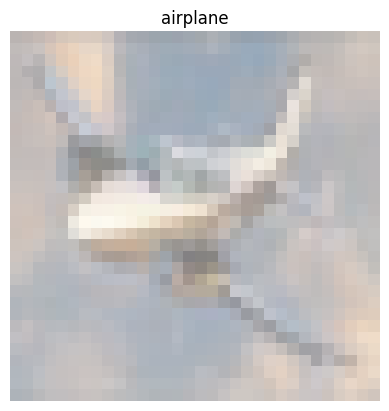

In [59]:
import torchvision
import torchvision.transforms as transforms
## Importing CIFAR10
CIFAR_Train_set = torchvision.datasets.CIFAR10(root="CIFAR", download=True,train=True, transform=transforms.Compose([transforms.ToTensor()]))
CIFAR_test_set = torchvision.datasets.CIFAR10(root="CIFAR", download=True,train=False, transform=transforms.Compose([transforms.ToTensor()]))
CIFAR_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
## Creating DataLoaders
CIFAR_train_dataloader = DataLoader(
    dataset = CIFAR_Train_set,
    batch_size = batch_size,
    shuffle = True
)

CIFAR_test_dataloader = DataLoader(
    dataset = CIFAR_test_set,
    batch_size = batch_size,
)
##Visualizing a sample
CIFAR_train_features_batch, CIFAR_train_labels_batch = next(iter(CIFAR_train_dataloader))
CIFAR_train_features_batch.shape, CIFAR_train_labels_batch.shape
img, label = CIFAR_train_features_batch[0], CIFAR_train_labels_batch[0]
mean, std = 0.5, 0.5
img = std * img + mean
plt.imshow(img.permute(1, 2, 0), cmap='gray')
plt.title(CIFAR_classes[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}")

In [60]:
# We move our tensor to the GPU if available
if (torch.cuda.is_available()):
    DEVICE = 'cuda'
else:
    DEVICE = 'cpu'
print(DEVICE)

cuda


<font color="#2ff9b3d"><h1>Part 3: SCNNB Implementation </h1></font>

In [62]:
# Create a convolutional neural network : SCNNB
class SCNNB(nn.Module):
    def __init__(self, input_shape, dim,  output_shape):
        super().__init__()
        
        self.CNN_block = nn.Sequential(
            nn.Conv2d(input_shape, 32, kernel_size = 3), 
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size = 3),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)

        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = 64*dim*dim, out_features = 1280),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features = 1280, out_features = output_shape),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.CNN_block(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [63]:
# Create a convolutional neural network : SCNNB-a
class SCNNB_a(nn.Module):
    def __init__(self, input_shape, dim, output_shape):
        super().__init__()
        
        self.CNN_block = nn.Sequential(
            nn.Conv2d(input_shape, 32, kernel_size = 3), 
          # nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size = 3),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)

        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = 64*dim*dim, out_features = 1280),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features = 1280, out_features = output_shape),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.CNN_block(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [64]:
# Create a convolutional neural network : SCNNB-b
class SCNNB_b(nn.Module):
    def __init__(self, input_shape, dim, output_shape):
        super().__init__()
        
        self.CNN_block = nn.Sequential(
            nn.Conv2d(input_shape, 32, kernel_size = 3), 
            # nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size = 3),
            # nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)

        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = 64*dim*dim, out_features = 1280),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features = 1280, out_features = output_shape),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.CNN_block(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [65]:
## Sample Model Description
model_SCNNB = SCNNB(input_shape=1, dim=5, output_shape=num_of_classes)
model_SCNNB_a = SCNNB_a(input_shape=1, dim=5,output_shape=num_of_classes)
# model_SCNNB_b = SCNNB_b(input_shape=1, dim=6,output_shape=num_of_classes)

model_SCNNB_a

SCNNB_a(
  (CNN_block): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1600, out_features=1280, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=1280, out_features=10, bias=True)
    (5): Softmax(dim=1)
  )
)

In [66]:
def train_step(model,
               data_loader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device):
    
    # Send model to GPU
    model.train()
    model = model.to(device)
    train_loss, train_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="  train") as train_tqdm:
        for X, y in train_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_pred = model(X)

            # 2. Calculate loss
            loss = loss_fn(y_pred, y)
            train_loss += loss
            train_acc += accuracy_fn(true=y.cpu(),
                                     pred=y_pred.cpu())
            counter += 1
            train_tqdm.set_postfix(train_acc="{:.3f}".format(train_acc/counter), train_loss=train_loss.item()/counter, refresh=False)

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backward
            loss.backward()

            # 5. Optimizer step
            optimizer.step()

        # Calculate loss and accuracy per epoch and print out what's happening
        train_loss /= len(data_loader)
        train_acc /= len(data_loader)
        
    return train_loss.item(), train_acc


In [67]:
def test_step(model,
              data_loader,
              loss_fn,
              accuracy_fn,
              device):
    
    # Send model to GPU
    model.to(device)

    # put model in eval mode
    model.eval() 
    test_loss, test_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="   test") as test_tqdm:
        for X, y in test_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(true=y.cpu(),
                                    pred=test_pred.cpu())
            counter += 1
            test_tqdm.set_postfix(test_acc="{:.3f}".format(test_acc/counter), test_loss=test_loss.item()/counter, refresh=True)

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc  /= len(data_loader)
            
    return test_loss.item(), test_acc

In [68]:
def train(hparams, train_data_loader, test_data_loader):
  # Datasets: 
  if (hparams[0] == 'MNIST' or hparams[0] == 'FMNIST' ):
    in_shape = in_shape_MNIST
    dim = dim_MNIST
  elif hparams[0] == 'CIFAR' :
    in_shape = in_shape_CIFAR
    dim = dim_CIFAR

  # Models:
  if hparams[1] == 'SCNNB':
    model = SCNNB(input_shape=in_shape, dim=dim, output_shape=num_of_classes)
  elif hparams[1] == 'SCNNB-a':
    model = SCNNB_a(input_shape=in_shape, dim=dim, output_shape=num_of_classes)
  elif hparams[1] == 'SCNNB-b':
    model = SCNNB_b(input_shape=in_shape, dim=dim, output_shape=num_of_classes)

  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.02, momentum=0.9, weight_decay=0.000005)
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  def accuracy_fn(true, pred):
      pred = F.softmax(pred, dim = 1)
      true = torch.zeros(pred.shape[0], pred.shape[1]).scatter_(1, true.unsqueeze(1), 1.)
      acc = (true.argmax(-1) == pred.argmax(-1)).float().detach().numpy()
      acc = float((100 * acc.sum()) / len(acc))
      return round(acc, 4)
  # Measure time
  from timeit import default_timer as timer

  train_epoch_loss = []
  train_epoch_accuracy = []
  test_epoch_loss = []
  test_epoch_accuracy = []

  train_time_start = timer()

  epochs = hparams[2]
  for epoch in range(epochs):
      print("EPOCH {}/{} :".format(epoch +1, epochs))
      train_loss, train_acc = train_step(data_loader=train_data_loader,
                                                model=model, 
                                                loss_fn=loss_fn,
                                                optimizer=optimizer,
                                                accuracy_fn=accuracy_fn,
                                                device=device
                                                )
      test_loss, test_acc = test_step(data_loader=test_data_loader,
                                      model=model,
                                      loss_fn=loss_fn,
                                      accuracy_fn=accuracy_fn,
                                      device=device
                                      )
      
      train_epoch_loss.append(train_loss)
      train_epoch_accuracy.append(train_acc)
      test_epoch_loss.append(test_loss)
      test_epoch_accuracy.append(test_acc)

  train_time_end = timer()
  total_time = train_time_end - train_time_start
  print(f"\n\nTrain time: {total_time:.3f} seconds")
  return model, train_epoch_loss, train_epoch_accuracy, test_epoch_loss, test_epoch_accuracy

In [69]:
hparams = ["CIFAR", "SCNNB", 150]
SCNNB_CIFAR_model, SCNNB_CIFAR_train_loss, SCNNB_CIFAR_train_accuracy, SCNNB_CIFAR_test_loss, SCNNB_CIFAR_test_accuracy = train(hparams ,CIFAR_train_dataloader, CIFAR_test_dataloader)

EPOCH 1/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.82it/s, test_acc=42.474, test_loss=2.03]


EPOCH 2/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.53it/s, test_acc=44.294, test_loss=2.01]


EPOCH 3/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.82it/s, test_acc=60.403, test_loss=1.86]


EPOCH 4/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.15it/s, test_acc=62.045, test_loss=1.84]


EPOCH 5/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.09it/s, test_acc=53.649, test_loss=1.92]


EPOCH 6/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.25it/s, test_acc=64.181, test_loss=1.82]


EPOCH 7/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.25it/s, test_acc=64.784, test_loss=1.81]


EPOCH 8/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.12it/s, test_acc=62.253, test_loss=1.84]


EPOCH 9/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.62it/s, test_acc=56.972, test_loss=1.89]


EPOCH 10/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.66it/s, test_acc=70.431, test_loss=1.76]


EPOCH 11/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.08it/s, test_acc=69.007, test_loss=1.77]


EPOCH 12/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.16it/s, test_acc=66.090, test_loss=1.8]


EPOCH 13/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.91it/s, test_acc=71.707, test_loss=1.75]


EPOCH 14/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 41.11it/s, test_acc=71.539, test_loss=1.75]


EPOCH 15/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.54it/s, test_acc=72.132, test_loss=1.74]


EPOCH 16/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.13it/s, test_acc=69.472, test_loss=1.77]


EPOCH 17/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 35.49it/s, test_acc=72.488, test_loss=1.74]


EPOCH 18/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 33.93it/s, test_acc=72.330, test_loss=1.74]


EPOCH 19/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.22it/s, test_acc=73.566, test_loss=1.73]


EPOCH 20/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 30.58it/s, test_acc=73.062, test_loss=1.73]


EPOCH 21/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.89it/s, test_acc=72.696, test_loss=1.73]


EPOCH 22/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 33.25it/s, test_acc=75.752, test_loss=1.71]


EPOCH 23/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 34.77it/s, test_acc=68.849, test_loss=1.77]


EPOCH 24/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.23it/s, test_acc=76.088, test_loss=1.7]


EPOCH 25/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.42it/s, test_acc=74.614, test_loss=1.71]


EPOCH 26/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.63it/s, test_acc=75.465, test_loss=1.71]


EPOCH 27/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.34it/s, test_acc=71.351, test_loss=1.75]


EPOCH 28/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.09it/s, test_acc=74.357, test_loss=1.72]


EPOCH 29/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.94it/s, test_acc=76.750, test_loss=1.7]


EPOCH 30/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.66it/s, test_acc=76.889, test_loss=1.69]


EPOCH 31/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.74it/s, test_acc=76.632, test_loss=1.69]


EPOCH 32/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.99it/s, test_acc=77.561, test_loss=1.69]


EPOCH 33/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.69it/s, test_acc=77.008, test_loss=1.69]


EPOCH 34/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.53it/s, test_acc=77.294, test_loss=1.69]


EPOCH 35/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.80it/s, test_acc=77.888, test_loss=1.68]


EPOCH 36/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.95it/s, test_acc=77.650, test_loss=1.69]


EPOCH 37/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.16it/s, test_acc=77.700, test_loss=1.69]


EPOCH 38/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.95it/s, test_acc=75.890, test_loss=1.7]


EPOCH 39/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.81it/s, test_acc=77.769, test_loss=1.69]


EPOCH 40/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.07it/s, test_acc=76.523, test_loss=1.7]


EPOCH 41/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.42it/s, test_acc=77.848, test_loss=1.68]


EPOCH 42/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.40it/s, test_acc=77.848, test_loss=1.68]


EPOCH 43/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.74it/s, test_acc=76.948, test_loss=1.69]


EPOCH 44/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.22it/s, test_acc=77.284, test_loss=1.69]


EPOCH 45/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.09it/s, test_acc=77.749, test_loss=1.69]


EPOCH 46/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.35it/s, test_acc=78.135, test_loss=1.68]


EPOCH 47/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.94it/s, test_acc=76.780, test_loss=1.69]


EPOCH 48/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.90it/s, test_acc=77.472, test_loss=1.69]


EPOCH 49/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.14it/s, test_acc=77.987, test_loss=1.68]


EPOCH 50/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.27it/s, test_acc=77.898, test_loss=1.68]


EPOCH 51/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.22it/s, test_acc=77.907, test_loss=1.68]


EPOCH 52/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.58it/s, test_acc=78.580, test_loss=1.68]


EPOCH 53/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.03it/s, test_acc=78.066, test_loss=1.68]


EPOCH 54/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.74it/s, test_acc=78.234, test_loss=1.68]


EPOCH 55/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.08it/s, test_acc=78.135, test_loss=1.68]


EPOCH 56/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.37it/s, test_acc=77.225, test_loss=1.69]


EPOCH 57/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.79it/s, test_acc=78.145, test_loss=1.68]


EPOCH 58/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.29it/s, test_acc=78.392, test_loss=1.68]


EPOCH 59/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.32it/s, test_acc=78.659, test_loss=1.67]


EPOCH 60/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 35.85it/s, test_acc=78.095, test_loss=1.68]


EPOCH 61/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 29.24it/s, test_acc=77.670, test_loss=1.69]


EPOCH 62/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 33.93it/s, test_acc=77.255, test_loss=1.69]


EPOCH 63/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.11it/s, test_acc=79.045, test_loss=1.67]


EPOCH 64/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 29.49it/s, test_acc=77.383, test_loss=1.69]


EPOCH 65/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 29.34it/s, test_acc=78.778, test_loss=1.68]


EPOCH 66/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 30.71it/s, test_acc=77.937, test_loss=1.68]


EPOCH 67/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.70it/s, test_acc=79.094, test_loss=1.67]


EPOCH 68/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 33.70it/s, test_acc=78.432, test_loss=1.68]


EPOCH 69/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 34.40it/s, test_acc=79.134, test_loss=1.67]


EPOCH 70/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 34.78it/s, test_acc=78.273, test_loss=1.68]


EPOCH 71/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.74it/s, test_acc=78.619, test_loss=1.68]


EPOCH 72/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.27it/s, test_acc=78.224, test_loss=1.68]


EPOCH 73/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.70it/s, test_acc=78.352, test_loss=1.68]


EPOCH 74/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.80it/s, test_acc=78.600, test_loss=1.68]


EPOCH 75/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.64it/s, test_acc=78.708, test_loss=1.68]


EPOCH 76/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.44it/s, test_acc=78.738, test_loss=1.67]


EPOCH 77/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.99it/s, test_acc=78.323, test_loss=1.68]


EPOCH 78/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.71it/s, test_acc=78.234, test_loss=1.68]


EPOCH 79/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.84it/s, test_acc=78.412, test_loss=1.68]


EPOCH 80/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.18it/s, test_acc=79.173, test_loss=1.67]


EPOCH 81/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.18it/s, test_acc=78.748, test_loss=1.67]


EPOCH 82/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.54it/s, test_acc=77.502, test_loss=1.69]


EPOCH 83/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.31it/s, test_acc=78.619, test_loss=1.68]


EPOCH 84/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.36it/s, test_acc=78.629, test_loss=1.67]


EPOCH 85/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.69it/s, test_acc=79.124, test_loss=1.67]


EPOCH 86/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.62it/s, test_acc=78.728, test_loss=1.67]


EPOCH 87/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.67it/s, test_acc=79.084, test_loss=1.67]


EPOCH 88/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.36it/s, test_acc=78.708, test_loss=1.67]


EPOCH 89/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.23it/s, test_acc=79.371, test_loss=1.67]


EPOCH 90/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.34it/s, test_acc=78.066, test_loss=1.68]


EPOCH 91/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.21it/s, test_acc=78.896, test_loss=1.67]


EPOCH 92/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.74it/s, test_acc=79.064, test_loss=1.67]


EPOCH 93/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.51it/s, test_acc=78.600, test_loss=1.67]


EPOCH 94/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.86it/s, test_acc=78.788, test_loss=1.67]


EPOCH 95/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.39it/s, test_acc=78.639, test_loss=1.68]


EPOCH 96/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.26it/s, test_acc=78.778, test_loss=1.67]


EPOCH 97/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.87it/s, test_acc=78.333, test_loss=1.68]


EPOCH 98/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.00it/s, test_acc=78.718, test_loss=1.67]


EPOCH 99/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.00it/s, test_acc=78.244, test_loss=1.68]


EPOCH 100/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.64it/s, test_acc=78.867, test_loss=1.67]


EPOCH 101/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.74it/s, test_acc=79.094, test_loss=1.67]


EPOCH 102/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.70it/s, test_acc=79.282, test_loss=1.67]


EPOCH 103/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.94it/s, test_acc=78.857, test_loss=1.67]


EPOCH 104/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.60it/s, test_acc=79.193, test_loss=1.67]


EPOCH 105/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.46it/s, test_acc=78.738, test_loss=1.67]


EPOCH 106/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.47it/s, test_acc=79.183, test_loss=1.67]


EPOCH 107/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.69it/s, test_acc=79.114, test_loss=1.67]


EPOCH 108/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.63it/s, test_acc=79.252, test_loss=1.67]


EPOCH 109/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.77it/s, test_acc=79.104, test_loss=1.67]


EPOCH 110/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.03it/s, test_acc=78.738, test_loss=1.67]


EPOCH 111/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.87it/s, test_acc=79.183, test_loss=1.67]


EPOCH 112/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.64it/s, test_acc=78.758, test_loss=1.67]


EPOCH 113/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.72it/s, test_acc=78.738, test_loss=1.67]


EPOCH 114/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 35.65it/s, test_acc=79.302, test_loss=1.67]


EPOCH 115/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.23it/s, test_acc=79.183, test_loss=1.67]


EPOCH 116/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.37it/s, test_acc=79.183, test_loss=1.67]


EPOCH 117/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.52it/s, test_acc=79.341, test_loss=1.67]


EPOCH 118/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.77it/s, test_acc=78.768, test_loss=1.67]


EPOCH 119/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.38it/s, test_acc=78.807, test_loss=1.67]


EPOCH 120/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.23it/s, test_acc=79.074, test_loss=1.67]


EPOCH 121/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.45it/s, test_acc=79.064, test_loss=1.67]


EPOCH 122/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.98it/s, test_acc=79.015, test_loss=1.67]


EPOCH 123/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.98it/s, test_acc=79.233, test_loss=1.67]


EPOCH 124/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.74it/s, test_acc=78.975, test_loss=1.67]


EPOCH 125/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.32it/s, test_acc=78.946, test_loss=1.67]


EPOCH 126/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.64it/s, test_acc=78.699, test_loss=1.67]


EPOCH 127/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.10it/s, test_acc=78.995, test_loss=1.67]


EPOCH 128/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.65it/s, test_acc=78.679, test_loss=1.67]


EPOCH 129/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.61it/s, test_acc=79.015, test_loss=1.67]


EPOCH 130/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.60it/s, test_acc=79.084, test_loss=1.67]


EPOCH 131/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.11it/s, test_acc=79.035, test_loss=1.67]


EPOCH 132/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.05it/s, test_acc=78.966, test_loss=1.67]


EPOCH 133/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.25it/s, test_acc=79.539, test_loss=1.67]


EPOCH 134/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.04it/s, test_acc=78.867, test_loss=1.67]


EPOCH 135/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.90it/s, test_acc=79.055, test_loss=1.67]


EPOCH 136/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.20it/s, test_acc=78.649, test_loss=1.67]


EPOCH 137/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.26it/s, test_acc=79.045, test_loss=1.67]


EPOCH 138/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.52it/s, test_acc=78.768, test_loss=1.67]


EPOCH 139/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.50it/s, test_acc=78.817, test_loss=1.67]


EPOCH 140/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.44it/s, test_acc=79.104, test_loss=1.67]


EPOCH 141/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.01it/s, test_acc=78.788, test_loss=1.67]


EPOCH 142/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.26it/s, test_acc=79.223, test_loss=1.67]


EPOCH 143/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.19it/s, test_acc=78.956, test_loss=1.67]


EPOCH 144/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.07it/s, test_acc=79.084, test_loss=1.67]


EPOCH 145/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 33.35it/s, test_acc=79.351, test_loss=1.67]


EPOCH 146/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 34.40it/s, test_acc=79.252, test_loss=1.67]


EPOCH 147/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.59it/s, test_acc=79.144, test_loss=1.67]


EPOCH 148/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 30.71it/s, test_acc=79.233, test_loss=1.67]


EPOCH 149/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.46it/s, test_acc=79.064, test_loss=1.67]


EPOCH 150/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.39it/s, test_acc=79.193, test_loss=1.67]



Train time: 1794.299 seconds


In [70]:
SCNNB_max_acc = max(SCNNB_CIFAR_test_accuracy)
SCNNB_MEAN = sum(SCNNB_CIFAR_test_accuracy)/len(SCNNB_CIFAR_test_accuracy)
print("Maximum Test Accuracy for SCNNB model is: ", str(SCNNB_max_acc))

Maximum Test Accuracy for SCNNB model is:  79.53916455696202


In [72]:
torch.save(SCNNB_CIFAR_model.state_dict(), 'SCNNB_CIFAR')

In [73]:
hparams = ["CIFAR", "SCNNB-a", 150]
SCNNB_a_CIFAR_model, SCNNB_a_CIFAR_train_loss, SCNNB_a_CIFAR_train_accuracy, SCNNB_a_CIFAR_test_loss, SCNNB_a_CIFAR_test_accuracy = train(hparams ,CIFAR_train_dataloader, CIFAR_test_dataloader)


EPOCH 1/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.04it/s, test_acc=35.938, test_loss=2.09]


EPOCH 2/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.01it/s, test_acc=51.483, test_loss=1.95]


EPOCH 3/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 41.17it/s, test_acc=44.947, test_loss=2.01]


EPOCH 4/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 41.23it/s, test_acc=59.227, test_loss=1.87]


EPOCH 5/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.89it/s, test_acc=59.840, test_loss=1.86]


EPOCH 6/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.53it/s, test_acc=61.818, test_loss=1.84]


EPOCH 7/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.31it/s, test_acc=65.605, test_loss=1.81]


EPOCH 8/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.20it/s, test_acc=66.822, test_loss=1.79]


EPOCH 9/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.63it/s, test_acc=66.584, test_loss=1.79]


EPOCH 10/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.78it/s, test_acc=67.939, test_loss=1.78]


EPOCH 11/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 35.82it/s, test_acc=64.359, test_loss=1.82]


EPOCH 12/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 34.56it/s, test_acc=62.362, test_loss=1.83]


EPOCH 13/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.89it/s, test_acc=67.098, test_loss=1.79]


EPOCH 14/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.31it/s, test_acc=71.203, test_loss=1.75]


EPOCH 15/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 29.95it/s, test_acc=69.600, test_loss=1.77]


EPOCH 16/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.35it/s, test_acc=70.945, test_loss=1.75]


EPOCH 17/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.58it/s, test_acc=68.048, test_loss=1.78]


EPOCH 18/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.40it/s, test_acc=72.834, test_loss=1.74]


EPOCH 19/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.46it/s, test_acc=68.938, test_loss=1.77]


EPOCH 20/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.66it/s, test_acc=72.162, test_loss=1.74]


EPOCH 21/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.75it/s, test_acc=74.565, test_loss=1.72]


EPOCH 22/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.57it/s, test_acc=73.428, test_loss=1.73]


EPOCH 23/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.78it/s, test_acc=75.129, test_loss=1.71]


EPOCH 24/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.53it/s, test_acc=75.504, test_loss=1.71]


EPOCH 25/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.91it/s, test_acc=76.355, test_loss=1.7]


EPOCH 26/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.45it/s, test_acc=74.684, test_loss=1.72]


EPOCH 27/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.64it/s, test_acc=74.268, test_loss=1.72]


EPOCH 28/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.48it/s, test_acc=75.287, test_loss=1.71]


EPOCH 29/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.83it/s, test_acc=76.088, test_loss=1.7]


EPOCH 30/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.76it/s, test_acc=75.841, test_loss=1.71]


EPOCH 31/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.64it/s, test_acc=75.643, test_loss=1.7]


EPOCH 32/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.96it/s, test_acc=76.345, test_loss=1.7]


EPOCH 33/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 35.35it/s, test_acc=76.503, test_loss=1.7]


EPOCH 34/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.23it/s, test_acc=76.523, test_loss=1.7]


EPOCH 35/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.45it/s, test_acc=75.841, test_loss=1.7]


EPOCH 36/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.84it/s, test_acc=76.652, test_loss=1.7]


EPOCH 37/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.01it/s, test_acc=75.544, test_loss=1.71]


EPOCH 38/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.01it/s, test_acc=76.968, test_loss=1.69]


EPOCH 39/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.75it/s, test_acc=77.275, test_loss=1.69]


EPOCH 40/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.79it/s, test_acc=75.979, test_loss=1.7]


EPOCH 41/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.35it/s, test_acc=77.631, test_loss=1.69]


EPOCH 42/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.65it/s, test_acc=76.375, test_loss=1.7]


EPOCH 43/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.51it/s, test_acc=77.265, test_loss=1.69]


EPOCH 44/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.42it/s, test_acc=77.433, test_loss=1.69]


EPOCH 45/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.58it/s, test_acc=76.800, test_loss=1.69]


EPOCH 46/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.60it/s, test_acc=76.820, test_loss=1.69]


EPOCH 47/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.49it/s, test_acc=75.801, test_loss=1.7]


EPOCH 48/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.99it/s, test_acc=77.027, test_loss=1.69]


EPOCH 49/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.88it/s, test_acc=77.512, test_loss=1.69]


EPOCH 50/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.74it/s, test_acc=77.799, test_loss=1.69]


EPOCH 51/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.88it/s, test_acc=76.701, test_loss=1.69]


EPOCH 52/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 29.76it/s, test_acc=78.016, test_loss=1.68]


EPOCH 53/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 30.82it/s, test_acc=76.780, test_loss=1.69]


EPOCH 54/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 28.47it/s, test_acc=78.451, test_loss=1.68]


EPOCH 55/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 30.61it/s, test_acc=76.562, test_loss=1.7]


EPOCH 56/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 28.30it/s, test_acc=78.174, test_loss=1.68]


EPOCH 57/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 28.57it/s, test_acc=77.314, test_loss=1.69]


EPOCH 58/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.18it/s, test_acc=77.502, test_loss=1.69]


EPOCH 59/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 33.20it/s, test_acc=78.194, test_loss=1.68]


EPOCH 60/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 35.53it/s, test_acc=77.789, test_loss=1.68]


EPOCH 61/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.37it/s, test_acc=78.066, test_loss=1.68]


EPOCH 62/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.83it/s, test_acc=78.224, test_loss=1.68]


EPOCH 63/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.79it/s, test_acc=78.165, test_loss=1.68]


EPOCH 64/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.22it/s, test_acc=78.224, test_loss=1.68]


EPOCH 65/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.13it/s, test_acc=78.333, test_loss=1.68]


EPOCH 66/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.78it/s, test_acc=78.254, test_loss=1.68]


EPOCH 67/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.84it/s, test_acc=77.927, test_loss=1.68]


EPOCH 68/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.48it/s, test_acc=78.303, test_loss=1.68]


EPOCH 69/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.97it/s, test_acc=75.959, test_loss=1.7]


EPOCH 70/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.91it/s, test_acc=78.214, test_loss=1.68]


EPOCH 71/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.34it/s, test_acc=77.542, test_loss=1.69]


EPOCH 72/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.13it/s, test_acc=78.066, test_loss=1.68]


EPOCH 73/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.89it/s, test_acc=77.858, test_loss=1.68]


EPOCH 74/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.91it/s, test_acc=78.204, test_loss=1.68]


EPOCH 75/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.56it/s, test_acc=78.323, test_loss=1.68]


EPOCH 76/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.81it/s, test_acc=78.422, test_loss=1.68]


EPOCH 77/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.38it/s, test_acc=78.699, test_loss=1.68]


EPOCH 78/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.70it/s, test_acc=78.491, test_loss=1.68]


EPOCH 79/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.99it/s, test_acc=77.640, test_loss=1.68]


EPOCH 80/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.20it/s, test_acc=78.768, test_loss=1.68]


EPOCH 81/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.05it/s, test_acc=77.996, test_loss=1.68]


EPOCH 82/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.08it/s, test_acc=78.214, test_loss=1.68]


EPOCH 83/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.47it/s, test_acc=78.263, test_loss=1.68]


EPOCH 84/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.58it/s, test_acc=78.402, test_loss=1.68]


EPOCH 85/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.98it/s, test_acc=78.254, test_loss=1.68]


EPOCH 86/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.67it/s, test_acc=78.402, test_loss=1.68]


EPOCH 87/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.24it/s, test_acc=78.343, test_loss=1.68]


EPOCH 88/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.62it/s, test_acc=78.224, test_loss=1.68]


EPOCH 89/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.75it/s, test_acc=78.451, test_loss=1.68]


EPOCH 90/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.31it/s, test_acc=78.372, test_loss=1.68]


EPOCH 91/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.26it/s, test_acc=77.848, test_loss=1.68]


EPOCH 92/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.78it/s, test_acc=78.570, test_loss=1.68]


EPOCH 93/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.57it/s, test_acc=78.392, test_loss=1.68]


EPOCH 94/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 34.10it/s, test_acc=78.481, test_loss=1.68]


EPOCH 95/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.13it/s, test_acc=78.639, test_loss=1.67]


EPOCH 96/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 29.46it/s, test_acc=78.224, test_loss=1.68]


EPOCH 97/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 28.28it/s, test_acc=78.501, test_loss=1.68]


EPOCH 98/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.03it/s, test_acc=78.362, test_loss=1.68]


EPOCH 99/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 35.27it/s, test_acc=78.530, test_loss=1.68]


EPOCH 100/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.32it/s, test_acc=78.659, test_loss=1.68]


EPOCH 101/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.97it/s, test_acc=78.649, test_loss=1.67]


EPOCH 102/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.12it/s, test_acc=78.778, test_loss=1.68]


EPOCH 103/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.36it/s, test_acc=78.590, test_loss=1.68]


EPOCH 104/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.98it/s, test_acc=78.263, test_loss=1.68]


EPOCH 105/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.69it/s, test_acc=78.530, test_loss=1.68]


EPOCH 106/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.03it/s, test_acc=78.511, test_loss=1.68]


EPOCH 107/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.06it/s, test_acc=78.896, test_loss=1.67]


EPOCH 108/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.75it/s, test_acc=78.629, test_loss=1.67]


EPOCH 109/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.93it/s, test_acc=78.669, test_loss=1.68]


EPOCH 110/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.23it/s, test_acc=77.284, test_loss=1.69]


EPOCH 111/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.02it/s, test_acc=78.669, test_loss=1.67]


EPOCH 112/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.49it/s, test_acc=78.817, test_loss=1.67]


EPOCH 113/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.86it/s, test_acc=78.352, test_loss=1.68]


EPOCH 114/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.59it/s, test_acc=78.155, test_loss=1.68]


EPOCH 115/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.50it/s, test_acc=78.293, test_loss=1.68]


EPOCH 116/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.40it/s, test_acc=78.530, test_loss=1.68]


EPOCH 117/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.77it/s, test_acc=78.817, test_loss=1.67]


EPOCH 118/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.65it/s, test_acc=78.540, test_loss=1.68]


EPOCH 119/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.11it/s, test_acc=78.303, test_loss=1.68]


EPOCH 120/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.33it/s, test_acc=78.352, test_loss=1.68]


EPOCH 121/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.06it/s, test_acc=78.847, test_loss=1.67]


EPOCH 122/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.26it/s, test_acc=78.827, test_loss=1.67]


EPOCH 123/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.98it/s, test_acc=78.600, test_loss=1.67]


EPOCH 124/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.49it/s, test_acc=79.134, test_loss=1.67]


EPOCH 125/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.60it/s, test_acc=78.600, test_loss=1.67]


EPOCH 126/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.40it/s, test_acc=78.718, test_loss=1.67]


EPOCH 127/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.02it/s, test_acc=78.521, test_loss=1.68]


EPOCH 128/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 34.37it/s, test_acc=77.917, test_loss=1.68]


EPOCH 129/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.53it/s, test_acc=78.263, test_loss=1.68]


EPOCH 130/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.75it/s, test_acc=77.799, test_loss=1.68]


EPOCH 131/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 30.91it/s, test_acc=78.254, test_loss=1.68]


EPOCH 132/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 29.34it/s, test_acc=78.699, test_loss=1.67]


EPOCH 133/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.10it/s, test_acc=78.194, test_loss=1.68]


EPOCH 134/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 33.00it/s, test_acc=78.511, test_loss=1.67]


EPOCH 135/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 35.76it/s, test_acc=78.867, test_loss=1.67]


EPOCH 136/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.20it/s, test_acc=78.867, test_loss=1.67]


EPOCH 137/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.16it/s, test_acc=78.797, test_loss=1.67]


EPOCH 138/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.70it/s, test_acc=78.985, test_loss=1.67]


EPOCH 139/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.55it/s, test_acc=78.521, test_loss=1.68]


EPOCH 140/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.21it/s, test_acc=78.540, test_loss=1.68]


EPOCH 141/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.40it/s, test_acc=78.788, test_loss=1.67]


EPOCH 142/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.64it/s, test_acc=78.699, test_loss=1.68]


EPOCH 143/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.67it/s, test_acc=78.461, test_loss=1.68]


EPOCH 144/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.06it/s, test_acc=78.639, test_loss=1.67]


EPOCH 145/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.18it/s, test_acc=78.352, test_loss=1.68]


EPOCH 146/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.99it/s, test_acc=78.689, test_loss=1.68]


EPOCH 147/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.15it/s, test_acc=78.847, test_loss=1.67]


EPOCH 148/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.05it/s, test_acc=78.244, test_loss=1.68]


EPOCH 149/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.44it/s, test_acc=79.015, test_loss=1.67]


EPOCH 150/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.53it/s, test_acc=78.886, test_loss=1.67]




Train time: 1781.489 seconds


In [74]:
SCNNB_a_max_acc = max(SCNNB_a_CIFAR_test_accuracy)
SCNNB_a_MEAN = sum(SCNNB_a_CIFAR_test_accuracy)/len(SCNNB_a_CIFAR_test_accuracy)
print("Maximum Test Accuracy for SCNNB-a model is: ", str(SCNNB_a_max_acc))

Maximum Test Accuracy for SCNNB-a model is:  79.13370126582281


In [75]:
torch.save(SCNNB_a_CIFAR_model.state_dict(), 'SCNNB_a_CIFAR')

In [78]:
hparams = ["CIFAR", "SCNNB-b", 150]
SCNNB_b_CIFAR_model, SCNNB_b_CIFAR_train_loss, SCNNB_b_CIFAR_train_accuracy, SCNNB_b_CIFAR_test_loss, SCNNB_b_CIFAR_test_accuracy = train(hparams ,CIFAR_train_dataloader, CIFAR_test_dataloader)


EPOCH 1/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 42.28it/s, test_acc=24.288, test_loss=2.2]


EPOCH 2/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 41.94it/s, test_acc=33.722, test_loss=2.12]


EPOCH 3/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 41.50it/s, test_acc=36.224, test_loss=2.09]


EPOCH 4/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 41.63it/s, test_acc=40.378, test_loss=2.05]


EPOCH 5/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.08it/s, test_acc=43.068, test_loss=2.03]


EPOCH 6/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.58it/s, test_acc=47.755, test_loss=1.98]


EPOCH 7/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 34.16it/s, test_acc=51.731, test_loss=1.94]


EPOCH 8/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.42it/s, test_acc=53.204, test_loss=1.93]


EPOCH 9/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.74it/s, test_acc=53.471, test_loss=1.92]


EPOCH 10/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.74it/s, test_acc=56.873, test_loss=1.89]


EPOCH 11/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 41.32it/s, test_acc=58.178, test_loss=1.88]


EPOCH 12/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.59it/s, test_acc=59.662, test_loss=1.86]


EPOCH 13/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 41.26it/s, test_acc=60.720, test_loss=1.85]


EPOCH 14/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.44it/s, test_acc=61.867, test_loss=1.84]


EPOCH 15/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.10it/s, test_acc=63.449, test_loss=1.83]


EPOCH 16/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.96it/s, test_acc=63.192, test_loss=1.83]


EPOCH 17/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.81it/s, test_acc=64.320, test_loss=1.82]


EPOCH 18/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.52it/s, test_acc=65.605, test_loss=1.81]


EPOCH 19/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.54it/s, test_acc=65.665, test_loss=1.81]


EPOCH 20/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.80it/s, test_acc=65.843, test_loss=1.8]


EPOCH 21/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.75it/s, test_acc=65.892, test_loss=1.8]


EPOCH 22/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 41.14it/s, test_acc=66.327, test_loss=1.8]


EPOCH 23/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.25it/s, test_acc=67.158, test_loss=1.79]


EPOCH 24/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.80it/s, test_acc=68.226, test_loss=1.78]


EPOCH 25/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 33.76it/s, test_acc=68.404, test_loss=1.78]


EPOCH 26/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.42it/s, test_acc=68.859, test_loss=1.77]


EPOCH 27/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.48it/s, test_acc=68.968, test_loss=1.77]


EPOCH 28/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 35.66it/s, test_acc=68.008, test_loss=1.78]


EPOCH 29/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.42it/s, test_acc=69.413, test_loss=1.77]


EPOCH 30/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.48it/s, test_acc=69.630, test_loss=1.76]


EPOCH 31/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.80it/s, test_acc=69.986, test_loss=1.76]


EPOCH 32/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.46it/s, test_acc=70.926, test_loss=1.75]


EPOCH 33/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.09it/s, test_acc=70.115, test_loss=1.76]


EPOCH 34/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.29it/s, test_acc=70.540, test_loss=1.75]


EPOCH 35/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.53it/s, test_acc=70.936, test_loss=1.75]


EPOCH 36/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.22it/s, test_acc=70.678, test_loss=1.75]


EPOCH 37/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.85it/s, test_acc=71.005, test_loss=1.75]


EPOCH 38/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.57it/s, test_acc=71.648, test_loss=1.75]


EPOCH 39/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.38it/s, test_acc=71.539, test_loss=1.75]


EPOCH 40/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.32it/s, test_acc=71.400, test_loss=1.74]


EPOCH 41/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.32it/s, test_acc=71.727, test_loss=1.74]


EPOCH 42/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 41.12it/s, test_acc=72.122, test_loss=1.74]


EPOCH 43/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 41.24it/s, test_acc=71.905, test_loss=1.74]


EPOCH 44/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.05it/s, test_acc=71.954, test_loss=1.74]


EPOCH 45/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.78it/s, test_acc=71.796, test_loss=1.74]


EPOCH 46/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.08it/s, test_acc=72.073, test_loss=1.74]


EPOCH 47/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 34.61it/s, test_acc=71.915, test_loss=1.74]


EPOCH 48/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.33it/s, test_acc=72.201, test_loss=1.74]


EPOCH 49/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 33.13it/s, test_acc=72.182, test_loss=1.74]


EPOCH 50/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.07it/s, test_acc=72.785, test_loss=1.73]


EPOCH 51/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.28it/s, test_acc=71.994, test_loss=1.74]


EPOCH 52/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.79it/s, test_acc=72.073, test_loss=1.74]


EPOCH 53/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.98it/s, test_acc=72.854, test_loss=1.73]


EPOCH 54/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.92it/s, test_acc=72.884, test_loss=1.73]


EPOCH 55/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.28it/s, test_acc=72.943, test_loss=1.73]


EPOCH 56/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.72it/s, test_acc=72.983, test_loss=1.73]


EPOCH 57/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.23it/s, test_acc=73.259, test_loss=1.73]


EPOCH 58/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.20it/s, test_acc=72.666, test_loss=1.73]


EPOCH 59/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.64it/s, test_acc=73.062, test_loss=1.73]


EPOCH 60/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.84it/s, test_acc=73.497, test_loss=1.73]


EPOCH 61/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.02it/s, test_acc=73.398, test_loss=1.73]


EPOCH 62/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.79it/s, test_acc=73.062, test_loss=1.73]


EPOCH 63/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.88it/s, test_acc=72.903, test_loss=1.73]


EPOCH 64/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.56it/s, test_acc=73.042, test_loss=1.73]


EPOCH 65/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.35it/s, test_acc=72.844, test_loss=1.73]


EPOCH 66/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.59it/s, test_acc=72.894, test_loss=1.73]


EPOCH 67/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.26it/s, test_acc=73.358, test_loss=1.73]


EPOCH 68/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.23it/s, test_acc=73.111, test_loss=1.73]


EPOCH 69/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.45it/s, test_acc=73.002, test_loss=1.73]


EPOCH 70/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 34.28it/s, test_acc=73.368, test_loss=1.73]


EPOCH 71/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 30.00it/s, test_acc=73.339, test_loss=1.73]


EPOCH 72/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.48it/s, test_acc=73.250, test_loss=1.73]


EPOCH 73/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.58it/s, test_acc=73.319, test_loss=1.73]


EPOCH 74/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.34it/s, test_acc=73.576, test_loss=1.72]


EPOCH 75/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.00it/s, test_acc=73.635, test_loss=1.72]


EPOCH 76/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.49it/s, test_acc=73.625, test_loss=1.72]


EPOCH 77/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.08it/s, test_acc=73.467, test_loss=1.73]


EPOCH 78/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.56it/s, test_acc=72.973, test_loss=1.73]


EPOCH 79/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.75it/s, test_acc=73.210, test_loss=1.73]


EPOCH 80/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.09it/s, test_acc=73.823, test_loss=1.72]


EPOCH 81/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.30it/s, test_acc=73.121, test_loss=1.73]


EPOCH 82/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.77it/s, test_acc=73.052, test_loss=1.73]


EPOCH 83/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.18it/s, test_acc=72.785, test_loss=1.73]


EPOCH 84/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.79it/s, test_acc=73.210, test_loss=1.73]


EPOCH 85/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 41.12it/s, test_acc=73.437, test_loss=1.72]


EPOCH 86/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.82it/s, test_acc=73.467, test_loss=1.73]


EPOCH 87/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.83it/s, test_acc=73.368, test_loss=1.73]


EPOCH 88/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.39it/s, test_acc=73.675, test_loss=1.72]


EPOCH 89/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 35.72it/s, test_acc=73.754, test_loss=1.72]


EPOCH 90/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.35it/s, test_acc=73.606, test_loss=1.72]


EPOCH 91/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.79it/s, test_acc=73.734, test_loss=1.72]


EPOCH 92/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.82it/s, test_acc=73.645, test_loss=1.72]


EPOCH 93/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 35.26it/s, test_acc=73.675, test_loss=1.72]


EPOCH 94/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.77it/s, test_acc=73.536, test_loss=1.73]


EPOCH 95/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.71it/s, test_acc=74.021, test_loss=1.72]


EPOCH 96/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.23it/s, test_acc=73.586, test_loss=1.73]


EPOCH 97/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 41.31it/s, test_acc=73.645, test_loss=1.72]


EPOCH 98/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.18it/s, test_acc=74.110, test_loss=1.72]


EPOCH 99/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.10it/s, test_acc=73.972, test_loss=1.72]


EPOCH 100/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.89it/s, test_acc=73.685, test_loss=1.72]


EPOCH 101/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 41.19it/s, test_acc=73.655, test_loss=1.72]


EPOCH 102/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.85it/s, test_acc=73.784, test_loss=1.72]


EPOCH 103/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.57it/s, test_acc=73.803, test_loss=1.72]


EPOCH 104/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.56it/s, test_acc=73.170, test_loss=1.73]


EPOCH 105/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.86it/s, test_acc=73.418, test_loss=1.72]


EPOCH 106/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 40.20it/s, test_acc=73.220, test_loss=1.73]


EPOCH 107/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.62it/s, test_acc=73.230, test_loss=1.73]


EPOCH 108/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.13it/s, test_acc=73.527, test_loss=1.72]


EPOCH 109/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.29it/s, test_acc=73.655, test_loss=1.72]


EPOCH 110/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 29.80it/s, test_acc=73.606, test_loss=1.73]


EPOCH 111/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 32.35it/s, test_acc=73.527, test_loss=1.72]


EPOCH 112/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 35.75it/s, test_acc=73.705, test_loss=1.72]


EPOCH 113/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.73it/s, test_acc=73.408, test_loss=1.73]


EPOCH 114/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.00it/s, test_acc=73.942, test_loss=1.72]


EPOCH 115/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.91it/s, test_acc=73.724, test_loss=1.72]


EPOCH 116/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.13it/s, test_acc=73.685, test_loss=1.72]


EPOCH 117/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.05it/s, test_acc=73.546, test_loss=1.72]


EPOCH 118/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.21it/s, test_acc=73.408, test_loss=1.73]


EPOCH 119/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.08it/s, test_acc=73.892, test_loss=1.72]


EPOCH 120/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.87it/s, test_acc=73.527, test_loss=1.72]


EPOCH 121/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.41it/s, test_acc=73.892, test_loss=1.72]


EPOCH 122/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.23it/s, test_acc=73.754, test_loss=1.72]


EPOCH 123/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.54it/s, test_acc=73.378, test_loss=1.73]


EPOCH 124/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.50it/s, test_acc=73.784, test_loss=1.72]


EPOCH 125/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.47it/s, test_acc=73.606, test_loss=1.72]


EPOCH 126/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.97it/s, test_acc=74.051, test_loss=1.72]


EPOCH 127/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 36.89it/s, test_acc=74.110, test_loss=1.72]


EPOCH 128/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.23it/s, test_acc=73.428, test_loss=1.73]


EPOCH 129/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.25it/s, test_acc=74.080, test_loss=1.72]


EPOCH 130/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.63it/s, test_acc=73.803, test_loss=1.72]


EPOCH 131/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.82it/s, test_acc=73.922, test_loss=1.72]


EPOCH 132/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.13it/s, test_acc=73.754, test_loss=1.72]


EPOCH 133/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.37it/s, test_acc=73.576, test_loss=1.73]


EPOCH 134/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 39.09it/s, test_acc=73.853, test_loss=1.72]


EPOCH 135/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.21it/s, test_acc=74.100, test_loss=1.72]


EPOCH 136/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.62it/s, test_acc=73.714, test_loss=1.72]


EPOCH 137/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.55it/s, test_acc=73.972, test_loss=1.72]


EPOCH 138/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.75it/s, test_acc=74.140, test_loss=1.72]


EPOCH 139/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.82it/s, test_acc=73.833, test_loss=1.72]


EPOCH 140/150 :


   test: 100%|██████████| 79/79 [00:01<00:00, 39.73it/s, test_acc=73.823, test_loss=1.72]


EPOCH 141/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.02it/s, test_acc=73.962, test_loss=1.72]


EPOCH 142/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 38.10it/s, test_acc=73.991, test_loss=1.72]


EPOCH 143/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 33.25it/s, test_acc=73.517, test_loss=1.72]


EPOCH 144/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.84it/s, test_acc=74.515, test_loss=1.72]


EPOCH 145/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 27.82it/s, test_acc=74.209, test_loss=1.72]


EPOCH 146/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 30.01it/s, test_acc=74.476, test_loss=1.72]


EPOCH 147/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 31.84it/s, test_acc=73.902, test_loss=1.72]


EPOCH 148/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 34.13it/s, test_acc=74.061, test_loss=1.72]


EPOCH 149/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.35it/s, test_acc=74.041, test_loss=1.72]


EPOCH 150/150 :


   test: 100%|██████████| 79/79 [00:02<00:00, 37.62it/s, test_acc=73.991, test_loss=1.72]



Train time: 1749.681 seconds


In [79]:
SCNNB_b_max_acc = max(SCNNB_b_CIFAR_test_accuracy)
SCNNB_b_MEAN = sum(SCNNB_b_CIFAR_test_accuracy)/len(SCNNB_b_CIFAR_test_accuracy)
print("Maximum Test Accuracy for SCNNB-b model is: ", str(SCNNB_b_max_acc))

Maximum Test Accuracy for SCNNB-b model is:  74.515435443038


In [80]:
torch.save(SCNNB_b_CIFAR_model.state_dict(), 'SCNNB_b_CIFAR')

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def Testing(model, model_name, data_loader):

    model.load_state_dict(torch.load(model_name))
    # Send model to GPU
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    model.to(device)

    # put model in eval mode
    model.eval() 

    loss_fn = nn.CrossEntropyLoss()
    def accuracy_fn(true, pred):
        pred = F.softmax(pred, dim = 1)
        true = torch.zeros(pred.shape[0], pred.shape[1]).scatter_(1, true.unsqueeze(1), 1.)
        acc = (true.argmax(-1) == pred.argmax(-1)).float().detach().numpy()
        acc = float((100 * acc.sum()) / len(acc))
        return round(acc, 4)

    test_loss, test_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="   test") as test_tqdm:
        for X, y in test_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)

            _, preds = torch.max(test_pred.data, 1)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(true=y.cpu(),
                                    pred=test_pred.cpu())
            counter += 1

            if counter==1 :
                y_true = (y.detach().cpu().numpy())
                y_pred = (preds.detach().cpu().numpy())
            else:
                y_true = np.concatenate((y_true, np.array(y.detach().cpu().numpy())), axis=0)
                y_pred = np.concatenate((y_pred, np.array(preds.detach().cpu().numpy())), axis=0)


            test_tqdm.set_postfix(test_acc="{:.3f}".format(test_acc/counter), test_loss=test_loss.item()/counter, refresh=True)


        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc  /= len(data_loader)

    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    cnf_matrix = confusion_matrix(y_true, y_pred)   ## Sklearn confusion matrix object
    accuracy = np.trace(cnf_matrix) / float(np.sum(cnf_matrix))
    misclass = 1 - accuracy

    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap = "Blues" ,fmt='g', xticklabels=class_names , yticklabels=class_names)
    ax.xaxis.set_label_position("bottom")
    plt.title('Confusion matrix for '+ model_name, y=1.1)
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.tight_layout()
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))
    return test_loss.item(), test_acc


   test: 100%|██████████| 79/79 [00:02<00:00, 36.04it/s, test_acc=79.193, test_loss=1.67]


              precision    recall  f1-score   support

    airplane     0.8345    0.8070    0.8205      1000
  automobile     0.8571    0.9060    0.8809      1000
        bird     0.7690    0.6690    0.7155      1000
         cat     0.6381    0.6260    0.6320      1000
        deer     0.7755    0.7600    0.7677      1000
         dog     0.6857    0.7310    0.7076      1000
        frog     0.8111    0.8800    0.8441      1000
       horse     0.8276    0.8400    0.8337      1000
        ship     0.8761    0.8630    0.8695      1000
       truck     0.8541    0.8490    0.8516      1000

    accuracy                         0.7931     10000
   macro avg     0.7929    0.7931    0.7923     10000
weighted avg     0.7929    0.7931    0.7923     10000


Test Accuracy for SCNNB model on CIFAR10 is: 79.19303670886077


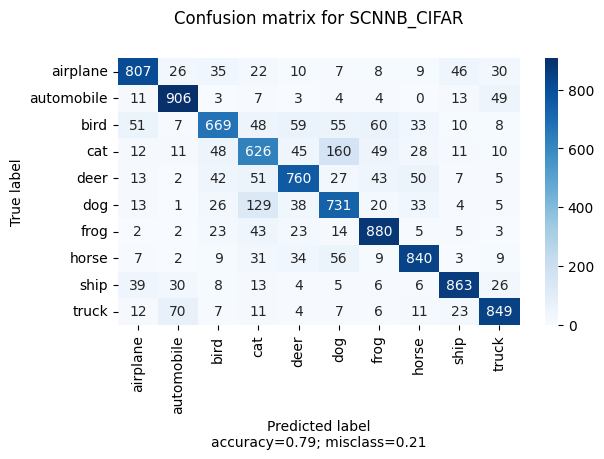

In [94]:
SCNNB_test_loss, SCNNB_test_acc = Testing(SCNNB_CIFAR_model, "SCNNB_CIFAR", CIFAR_test_dataloader )
print("\nTest Accuracy for SCNNB model on CIFAR10 is: "+str(SCNNB_test_acc))

   test: 100%|██████████| 79/79 [00:01<00:00, 39.82it/s, test_acc=78.886, test_loss=1.67]


              precision    recall  f1-score   support

    airplane     0.8153    0.8120    0.8136      1000
  automobile     0.8824    0.8550    0.8685      1000
        bird     0.7405    0.6820    0.7100      1000
         cat     0.6587    0.6100    0.6334      1000
        deer     0.7350    0.7960    0.7643      1000
         dog     0.7328    0.6940    0.7129      1000
        frog     0.8204    0.8590    0.8393      1000
       horse     0.8313    0.8180    0.8246      1000
        ship     0.8595    0.8870    0.8730      1000
       truck     0.8037    0.8800    0.8401      1000

    accuracy                         0.7893     10000
   macro avg     0.7880    0.7893    0.7880     10000
weighted avg     0.7880    0.7893    0.7880     10000


Test Accuracy for SCNNB-a model on CIFAR10 is: 78.88646962025317


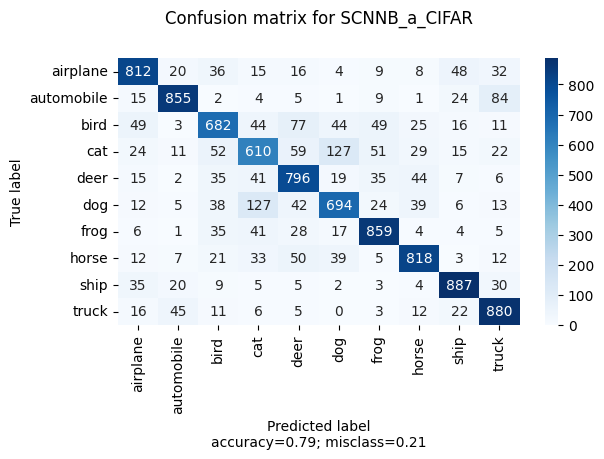

In [95]:
SCNNB_a_test_loss, SCNNB_a_test_acc = Testing(SCNNB_a_CIFAR_model, "SCNNB_a_CIFAR", CIFAR_test_dataloader )
print("\nTest Accuracy for SCNNB-a model on CIFAR10 is: "+str(SCNNB_a_test_acc))

   test: 100%|██████████| 79/79 [00:01<00:00, 40.18it/s, test_acc=73.991, test_loss=1.72]


              precision    recall  f1-score   support

    airplane     0.7908    0.7940    0.7924      1000
  automobile     0.8554    0.8400    0.8476      1000
        bird     0.6174    0.6520    0.6342      1000
         cat     0.6039    0.5260    0.5623      1000
        deer     0.7158    0.6850    0.7001      1000
         dog     0.6521    0.6130    0.6320      1000
        frog     0.7157    0.8610    0.7817      1000
       horse     0.7869    0.7680    0.7773      1000
        ship     0.8328    0.8420    0.8374      1000
       truck     0.8100    0.8100    0.8100      1000

    accuracy                         0.7391     10000
   macro avg     0.7381    0.7391    0.7375     10000
weighted avg     0.7381    0.7391    0.7375     10000


Test Accuracy for SCNNB-b model on CIFAR10 is: 73.99129367088611


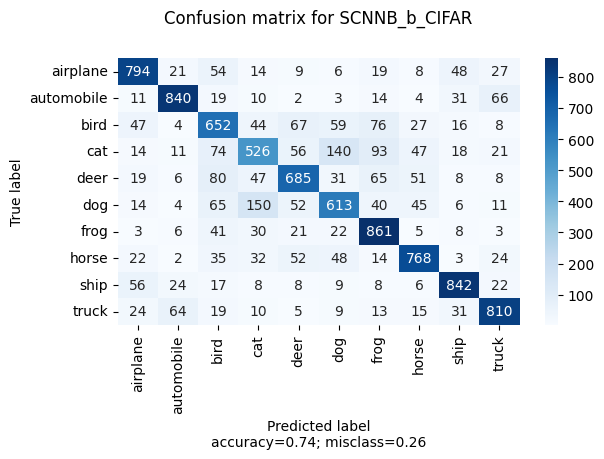

In [96]:
SCNNB_b_test_loss, SCNNB_b_test_acc = Testing(SCNNB_b_CIFAR_model, "SCNNB_b_CIFAR", CIFAR_test_dataloader )
print("\nTest Accuracy for SCNNB-b model on CIFAR10 is: "+str(SCNNB_b_test_acc))

In [87]:
def acc_test_plots(SCNNB_test, SCNNB_a_test, SCNNB_b_test):
  
    num_epochs = len(SCNNB_test)
    plt.figure(figsize=(13,5))
    plt.plot(SCNNB_a_test , 'b', label='SCNNB-a', linestyle = '-')
    plt.plot(SCNNB_b_test , 'g', label='SCNNB-b', linestyle = '-.')
    plt.plot(SCNNB_test, 'r', label='SCNNB', linestyle = ':')
    plt.ylabel('Test Accuracy', fontsize=10, labelpad=8)
    plt.xlabel('Epochs', fontsize=10, labelpad=8)
    plt.title('Test Accuracy for CIFAR dataset', fontsize=25, pad=15)
    plt.legend()
    sns.despine()
    plt.show()

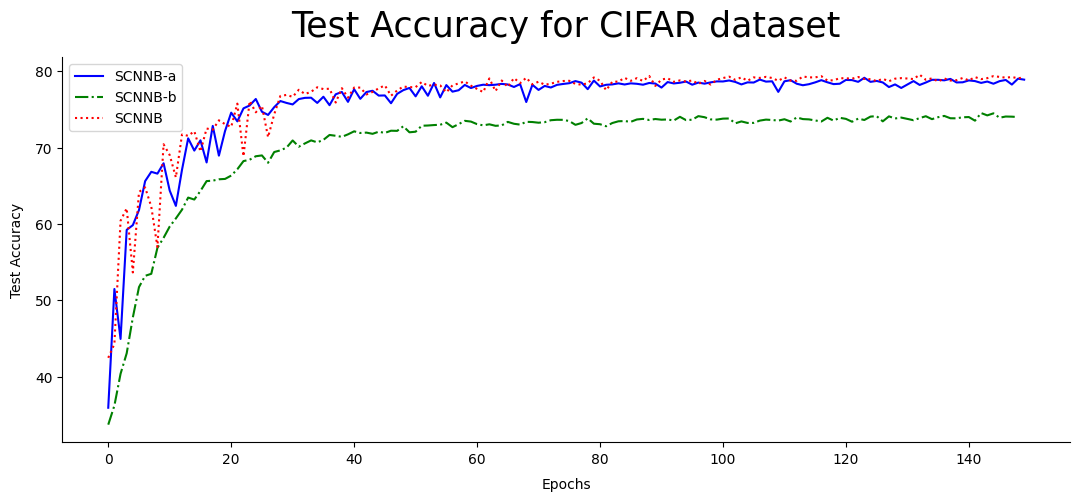

In [98]:
acc_test_plots(SCNNB_CIFAR_test_accuracy, SCNNB_a_CIFAR_test_accuracy, SCNNB_b_CIFAR_test_accuracy[1:])

In [89]:
def acc_train_plots(SCNNB_train, SCNNB_a_train, SCNNB_b_train):
  
    num_epochs = len(SCNNB_train)
    plt.figure(figsize=(13,5))
    plt.plot(SCNNB_a_train , 'b', label='SCNNB-a', linestyle = '-')
    plt.plot(SCNNB_b_train , 'g', label='SCNNB-b', linestyle = '-.')
    plt.plot(SCNNB_train, 'r', label='SCNNB', linestyle = ':')
    plt.ylabel('Train Accuracy', fontsize=10, labelpad=8)
    plt.xlabel('Epochs', fontsize=10, labelpad=8)
    plt.title('Train Accuracy for CIFAR10 dataset', fontsize=25, pad=15)
    plt.legend()
    sns.despine()
    plt.show()

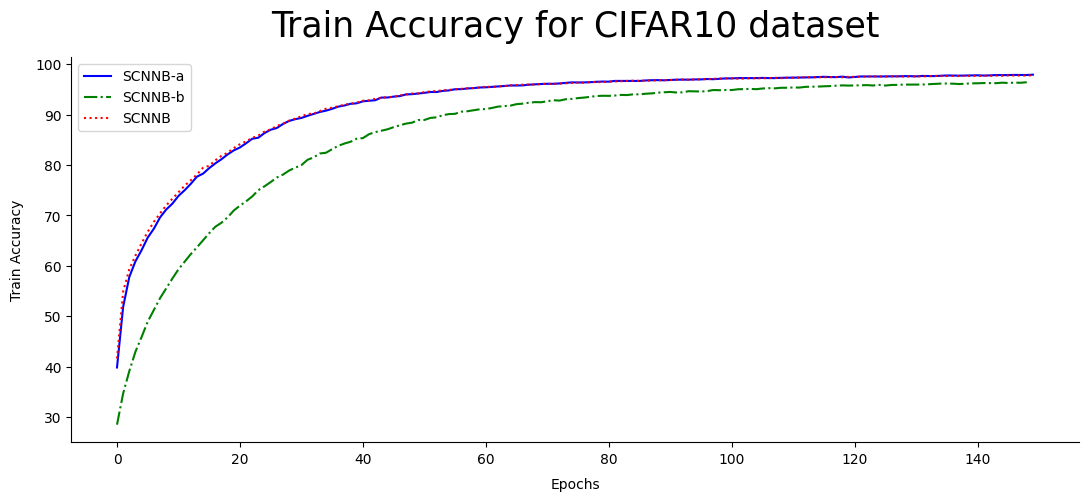

In [99]:
acc_train_plots(SCNNB_CIFAR_train_accuracy, SCNNB_a_CIFAR_train_accuracy, SCNNB_b_CIFAR_train_accuracy[1:])

In [91]:
def loss_train_plots(SCNNB_train, SCNNB_a_train, SCNNB_b_train):
  
    num_epochs = len(SCNNB_train)
    plt.figure(figsize=(13,5))
    plt.plot(SCNNB_a_train , 'b', label='SCNNB-a', linestyle = '-')
    plt.plot(SCNNB_b_train , 'g', label='SCNNB-b', linestyle = '-.')
    plt.plot(SCNNB_train, 'r', label='SCNNB', linestyle = ':')
    plt.ylabel('Train Accuracy', fontsize=10, labelpad=8)
    plt.xlabel('Epochs', fontsize=10, labelpad=8)
    plt.title('Train Loss for CIFAR10 dataset', fontsize=25, pad=15)
    plt.legend()
    sns.despine()
    plt.show()

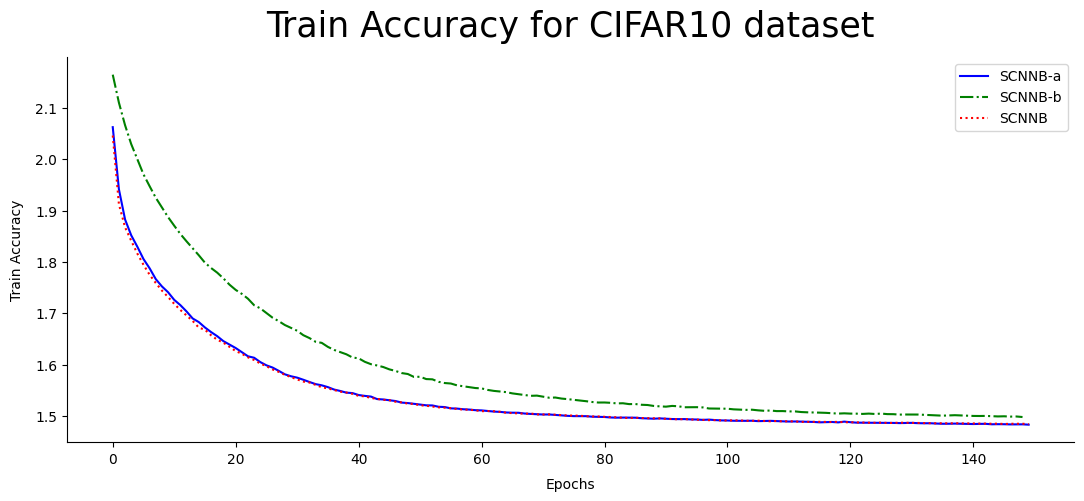

In [92]:
acc_train_plots(SCNNB_CIFAR_train_loss, SCNNB_a_CIFAR_train_loss, SCNNB_b_CIFAR_train_loss[1:])